In [ ]:
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



Using TensorFlow version 2.5.0


In [ ]:
import pandas as pd

# Library
import pandas as pd
import numpy as np

# Load Data
test1 = pd.read_csv("/content/drive/MyDrive/banglacharactertrain1.csv")
test2 = pd.read_csv("/content/drive/MyDrive/banglacharactertrain2.csv")
test3 = pd.read_csv("/content/drive/MyDrive/bangladigittrain3.csv")

train1 = pd.read_csv("/content/drive/MyDrive/banglacharactertest1.csv")
train2 = pd.read_csv("/content/drive/MyDrive/bangladigittest2.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#concate dataframes
train = pd.concat([train1,train2])
test= pd.concat([test1,test2,test3])

In [ ]:
train.shape


(94240, 785)

In [ ]:
test.shape

(89871, 785)

In [ ]:
# Separating Data and Label
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# Separating Data and Label
Y_test = test["label"]
X_test = test.drop(labels = ["label"],axis = 1)



In [ ]:
# Normalize the data
##X_train = X_train / 255.0

# Reshape the array into 28 x 28 pixel
X_train = X_train.values.reshape(94240,28,28)
Y_train = Y_train.values.reshape(94240,)

#x_train_reshaped = np.reshape(X_train ,(94240,784))

# Normalize the data
##X_test = X_test / 255.0

# Reshape the array into 28 x 28 pixel
X_test = X_test.values.reshape(89871,28,28)
Y_test = Y_test.values.reshape(89871,)

#x_test_reshaped = np.reshape(X_test ,(89871,784))

x_test_reshaped = np.reshape(X_test ,(89871,28,28,1))
x_train_reshaped = np.reshape(X_train ,(94240,28,28,1))


In [ ]:
print(x_test_reshaped)

In [ ]:
for i in range(len(x_train_reshaped)):
    
    img_float32=np.float32(x_train_reshaped[i])
    _, img_float32 = cv2.threshold(img_float32, 120, 255, cv2.THRESH_BINARY)
    x_train_reshaped[i] =np.reshape(img_float32, (28,28,1))

In [ ]:
print(x_test_reshaped[0])

In [ ]:
for i in range(len(x_test_reshaped)):
    
    img_float32=np.float32(x_test_reshaped[i])
    _, img_float32 = cv2.threshold(img_float32, 120, 255, cv2.THRESH_BINARY)
    x_test_reshaped[i] =np.reshape(img_float32, (28,28,1))

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(X_train[35001], cmap='binary')
plt.show()

In [ ]:
plt.imshow(X_test[5], cmap='binary')
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(Y_train)
y_test_encoded = to_categorical(Y_test)

In [ ]:
y_test_encoded.shape

In [ ]:
y_train_encoded.shape

In [ ]:
y_train_encoded[0]

In [ ]:
print(set(y_train_encoded[0]))

In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10
x_train_norm=x_train_reshaped
x_test_norm=x_test_reshaped
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [ ]:
#print(set(x_train_norm[0]))

In [ ]:
model = Sequential()
# model = Sequential([
#                     Dense(128,activation='relu' , input_shape=(784,)),
#                     Dense(128,activation='relu'),
#                    Dense(128,activation='relu'),
#                     Dense(122,activation='softmax')
# ])

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(122,activation='softmax'))


In [ ]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model.summary()

########################

In [ ]:
history = model.fit(x_train_norm, y_train_encoded, epochs=20 , validation_data = (x_test_norm, y_test_encoded))

Epoch 1/20
2945/2945 [==============================] - 147s 50ms/step - loss: 0.0729 - accuracy: 0.9778 - val_loss: 0.5726 - val_accuracy: 0.8729
Epoch 2/20
2945/2945 [==============================] - 143s 49ms/step - loss: 0.0653 - accuracy: 0.9805 - val_loss: 0.5460 - val_accuracy: 0.8810
Epoch 3/20
2945/2945 [==============================] - 142s 48ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.6092 - val_accuracy: 0.8736
Epoch 4/20
2945/2945 [==============================] - 143s 49ms/step - loss: 0.0526 - accuracy: 0.9841 - val_loss: 0.5927 - val_accuracy: 0.8783
Epoch 5/20
2945/2945 [==============================] - 143s 49ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.6042 - val_accuracy: 0.8838
Epoch 6/20
2945/2945 [==============================] - 144s 49ms/step - loss: 0.0424 - accuracy: 0.9871 - val_loss: 0.6122 - val_accuracy: 0.8806
Epoch 7/20
2945/2945 [==============================] - 147s 50ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0

In [ ]:
model.save('model_hand_reco.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.8729289770126343, 0.881018340587616, 0.8735966086387634, 0.8782811164855957, 0.8838446140289307, 0.8806288838386536, 0.8787373304367065, 0.8786482810974121, 0.8764228820800781, 0.8775801062583923, 0.8834106922149658, 0.8784480094909668, 0.881007194519043, 0.8760779500007629, 0.8830879926681519, 0.8831436038017273, 0.8848794102668762, 0.878470242023468, 0.8859364986419678, 0.8895193934440613]
The training accuracy is : [0.9778332114219666, 0.9805390238761902, 0.9813454747200012, 0.9841043949127197, 0.9857597351074219, 0.9871180057525635, 0.98829585313797, 0.9894737005233765, 0.9912987947463989, 0.9907576441764832, 0.9920203685760498, 0.9936438798904419, 0.9949596524238586, 0.9935696125030518, 0.9939197897911072, 0.9969015121459961, 0.9976018667221069, 0.9983022212982178, 0.9989176392555237, 0.9997453093528748]
The validation loss is : [0.5725606679916382, 0.5460423231124878, 0.6091995239257812, 0.5926530957221985, 0.6042464971542358, 0.6122443675994873, 0

In [ ]:
#loss , accuracy = model.evaluate(x_test_norm, y_test_encoded)

#print('Test set accuracy:' , accuracy*100)

In [ ]:
predictions = model.predict(x_test_norm)
print(predictions.shape)

(89871, 122)


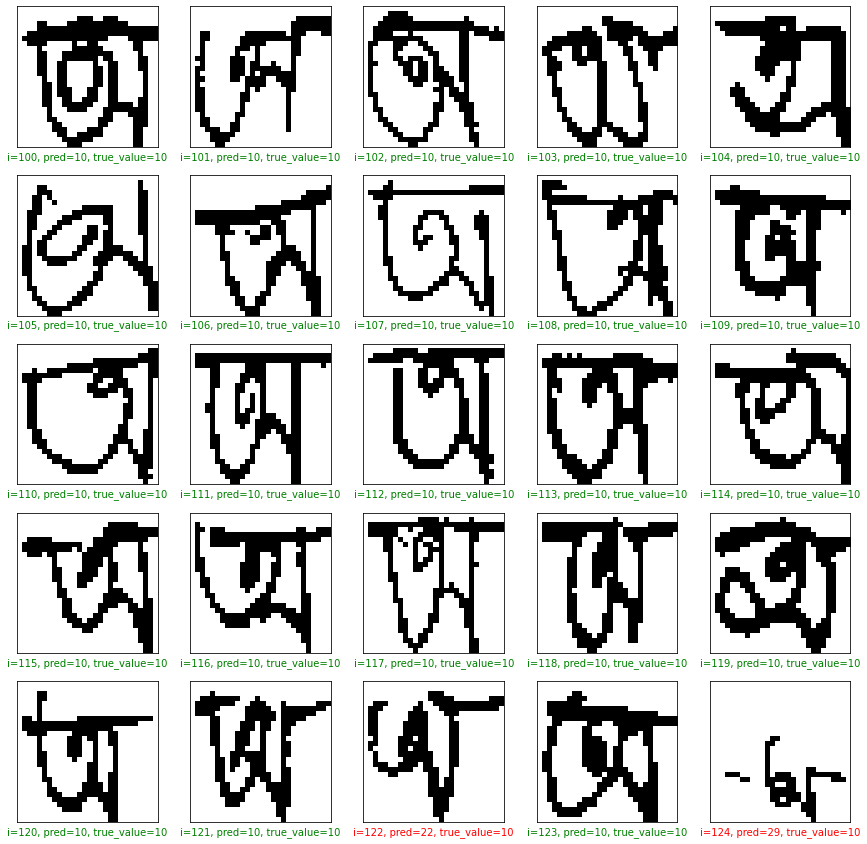

In [ ]:
plt.figure(figsize=(15,15))

start_index= 100;

for i in range(25):
  plt.subplot(5 , 5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  prediction = np.argmax(predictions[start_index+i])
  true_value = Y_test[start_index+i]

  col = 'g'
  if prediction != true_value:
    col = 'r'

  plt.xlabel('i={}, pred={}, true_value={}' .format(start_index+i, prediction, true_value), color=col)
  plt.imshow(X_test[start_index+i], cmap='binary')
plt.show()

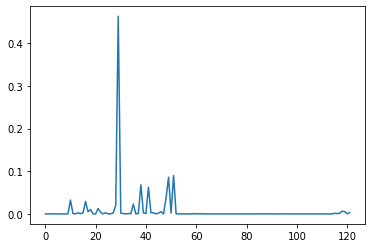

In [ ]:
plt.plot(predictions[124])
plt.show()

In [ ]:
prediction = np.argmax(predictions[124])

In [ ]:
prediction

29

In [ ]:
Y_test[124]

10

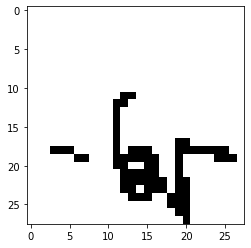

In [ ]:
plt.imshow(X_test[124], cmap='binary')
plt.show()

#### predict with external image

In [ ]:
img = cv2.imread('data/10-1.jpg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
plt.imshow(img, cmap='binary')
plt.show()

AttributeError: ignored

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
plt.imshow(img_final, cmap='binary')
plt.show()
img_final =np.reshape(img_final, (1,28,28,1))
print(img_final)
#img_final = (img_final - x_mean) / (x_std + epsilon)  #normalize input image

In [ ]:
print(x_mean)
print(x_std + epsilon)

In [ ]:
img_pred = str(np.argmax(model.predict(img_final)))
cv2.putText(img, "Prediction: " + img_pred, (20,25), cv2.FONT_HERSHEY_DUPLEX, 1, color = (0,0,0))
cv2.imshow('handwritten character recognition _ _ _ ', img)

In [ ]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27: #press esc to exit
        break
cv2.destroyAllWindows()